In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,mean_squared_error,r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB

df = pd.read_csv("E:\Work\College_works\Assignments\ML\ML_Coursework\Disease_Prediction\Data\\blood_samples_dataset_test.csv") 
display(df.head())

# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,mean_squared_error,r2_score
# import seaborn as sns
# import matplotlib.pyplot as plt

# df = pd.read_csv("E:\Work\College_works\Assignments\ML\ML_Coursework\Disease_Prediction\Data\\Blood_samples_dataset_balanced_2(f).csv") 
# display(df.head())

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.001827,0.033693,0.114755,0.997927,0.562604,0.866499,0.578042,0.914615,0.026864,0.038641,...,0.653230,0.186104,0.430398,0.016678,0.885352,0.652733,0.788235,0.054788,0.031313,Thalasse
1,0.436679,0.972653,0.084998,0.180909,0.675736,0.563889,0.798382,0.670361,0.376092,0.184890,...,0.833540,0.153001,0.458533,0.401845,0.635969,0.574425,0.047025,0.607985,0.594123,Diabetes
2,0.545697,0.324815,0.584467,0.475748,0.558596,0.661007,0.934056,0.381782,0.500342,0.531829,...,0.678901,0.220479,0.817151,0.690981,0.101633,0.855740,0.551124,0.413294,0.070909,Heart Di
3,0.172994,0.050351,0.736000,0.782022,0.069435,0.085219,0.032907,0.460619,0.785448,0.491495,...,0.381500,0.459396,0.420154,0.798537,0.399236,0.324600,0.499504,0.436662,0.242766,Diabetes
4,0.758534,0.739968,0.597868,0.772683,0.875720,0.860265,0.486189,0.486686,0.621048,0.191756,...,0.993381,0.272338,0.663579,0.265227,0.918847,0.804910,0.571119,0.188368,0.750848,Heart Di


In [64]:
#encode categorical labels (Disease column)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
convertedData = df.copy()  
convertedData['Disease']= le.fit_transform(df['Disease'].astype(str))
display(convertedData.head())

# information about the dataset
print(df.shape)  
print(df.info()) 
print(df.describe()) 
print(df['Disease'].unique()) 
print(df['Disease'].value_counts()) 

# Check and remove duplicates
print(f"Duplicates: {df.duplicated().sum()}")
df = df.drop_duplicates()

#get information related null values
display(df.isnull().sum())

# Impute numerical features (if any missing)
numerical_cols = df.columns[:-1] 
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())#fill null data

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.001827,0.033693,0.114755,0.997927,0.562604,0.866499,0.578042,0.914615,0.026864,0.038641,...,0.653230,0.186104,0.430398,0.016678,0.885352,0.652733,0.788235,0.054788,0.031313,4
1,0.436679,0.972653,0.084998,0.180909,0.675736,0.563889,0.798382,0.670361,0.376092,0.184890,...,0.833540,0.153001,0.458533,0.401845,0.635969,0.574425,0.047025,0.607985,0.594123,1
2,0.545697,0.324815,0.584467,0.475748,0.558596,0.661007,0.934056,0.381782,0.500342,0.531829,...,0.678901,0.220479,0.817151,0.690981,0.101633,0.855740,0.551124,0.413294,0.070909,3
3,0.172994,0.050351,0.736000,0.782022,0.069435,0.085219,0.032907,0.460619,0.785448,0.491495,...,0.381500,0.459396,0.420154,0.798537,0.399236,0.324600,0.499504,0.436662,0.242766,1
4,0.758534,0.739968,0.597868,0.772683,0.875720,0.860265,0.486189,0.486686,0.621048,0.191756,...,0.993381,0.272338,0.663579,0.265227,0.918847,0.804910,0.571119,0.188368,0.750848,3


(486, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    486 non-null    float64
 1   Cholesterol                                486 non-null    float64
 2   Hemoglobin                                 486 non-null    float64
 3   Platelets                                  486 non-null    float64
 4   White Blood Cells                          486 non-null    float64
 5   Red Blood Cells                            486 non-null    float64
 6   Hematocrit                                 486 non-null    float64
 7   Mean Corpuscular Volume                    486 non-null    float64
 8   Mean Corpuscular Hemoglobin                486 non-null    float64
 9   Mean Corpuscular Hemoglobin Concentration  486 non-null    float64
 10  Insulin         

Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                                   0
Creatinine   

In [46]:
corr = convertedData.corr()
corr.style.background_gradient(cmap='coolwarm')

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,Insulin,BMI,Systolic Blood Pressure,Diastolic Blood Pressure,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
Glucose,1.000000,0.041716,-0.033918,-0.044161,0.014082,0.099692,0.017898,-0.021956,0.115377,0.020463,-0.051997,0.057148,0.053395,0.017041,-0.026571,0.059606,-0.038671,-0.003912,0.008495,0.055358,0.042778,0.034157,0.030084,-0.057289,-0.131351
Cholesterol,0.041716,1.000000,-0.082814,-0.018645,-0.037447,0.089261,0.070890,0.003759,0.078588,0.101201,-0.047341,-0.038441,-0.019163,0.062282,-0.050572,-0.014955,-0.039932,0.013919,0.006140,0.081820,0.031888,0.007317,-0.019628,0.000469,-0.032747
Hemoglobin,-0.033918,-0.082814,1.000000,-0.071351,-0.053571,-0.043260,-0.060376,0.020023,-0.014829,-0.014435,0.043210,-0.039921,-0.022898,-0.023256,-0.025783,-0.031939,-0.027649,0.020690,0.055712,-0.037836,-0.065433,0.029496,0.010196,-0.038146,-0.041784
Platelets,-0.044161,-0.018645,-0.071351,1.000000,0.006125,-0.071980,0.019951,0.029870,0.023604,-0.027918,-0.006257,0.132941,-0.059136,0.067048,0.010490,0.020551,0.026365,0.036883,-0.031587,-0.009001,-0.018892,0.003540,0.006910,-0.032405,-0.102648
White Blood Cells,0.014082,-0.037447,-0.053571,0.006125,1.000000,0.089398,0.027318,0.050894,-0.009425,-0.015990,-0.077885,0.010977,-0.027616,0.005510,-0.014424,-0.084988,0.029464,-0.031254,-0.025951,0.017316,0.009744,-0.149898,-0.050551,-0.075215,0.241368
Red Blood Cells,0.099692,0.089261,-0.043260,-0.071980,0.089398,1.000000,0.030484,-0.006270,-0.063587,-0.002481,0.005705,-0.080650,-0.060273,-0.018568,0.010618,-0.011538,-0.028023,0.042918,0.035138,-0.004586,0.056263,-0.031191,-0.043829,0.017739,0.254369
Hematocrit,0.017898,0.070890,-0.060376,0.019951,0.027318,0.030484,1.000000,0.014085,-0.012708,-0.007661,-0.050393,0.035657,-0.075840,-0.024565,0.021707,-0.037721,0.046428,-0.003095,0.015224,-0.002026,-0.060802,0.028159,-0.053756,0.013921,0.179136
Mean Corpuscular Volume,-0.021956,0.003759,0.020023,0.029870,0.050894,-0.006270,0.014085,1.000000,0.056634,0.097303,0.023160,-0.020803,0.045616,-0.051330,0.070058,0.040009,0.022514,0.042710,-0.005969,-0.037105,-0.068362,-0.038353,0.066936,0.054672,0.024293
Mean Corpuscular Hemoglobin,0.115377,0.078588,-0.014829,0.023604,-0.009425,-0.063587,-0.012708,0.056634,1.000000,0.053716,-0.066917,0.018533,0.026032,0.034992,0.017746,0.007591,-0.052265,-0.037074,0.006245,-0.023613,-0.083603,-0.036914,0.142494,-0.127203,-0.106686
Mean Corpuscular Hemoglobin Concentration,0.020463,0.101201,-0.014435,-0.027918,-0.015990,-0.002481,-0.007661,0.097303,0.053716,1.000000,-0.085051,0.007691,0.051672,-0.064274,-0.055663,0.023053,0.022143,-0.027161,-0.076798,0.032895,0.036256,-0.013566,0.005117,0.038146,-0.012350


In [66]:
# Identify highly correlated features (|corr| > 0.8)
threshold = 0.8
high_corr = set()
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > threshold:
            colname = corr.columns[i]
            high_corr.add(colname)

print(f"Highly correlated features to consider dropping: {high_corr}")
# Drop correlated features (manual decision based on domain knowledge)
df_reduced = convertedData.drop(high_corr, axis=1)
display(df_reduced.head())

Highly correlated features to consider dropping: set()


,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.001827,0.033693,0.114755,0.997927,0.562604,0.866499,0.578042,0.914615,0.026864,0.038641,...,0.653230,0.186104,0.430398,0.016678,0.885352,0.652733,0.788235,0.054788,0.031313,4
1,0.436679,0.972653,0.084998,0.180909,0.675736,0.563889,0.798382,0.670361,0.376092,0.184890,...,0.833540,0.153001,0.458533,0.401845,0.635969,0.574425,0.047025,0.607985,0.594123,1
2,0.545697,0.324815,0.584467,0.475748,0.558596,0.661007,0.934056,0.381782,0.500342,0.531829,...,0.678901,0.220479,0.817151,0.690981,0.101633,0.855740,0.551124,0.413294,0.070909,3
3,0.172994,0.050351,0.736000,0.782022,0.069435,0.085219,0.032907,0.460619,0.785448,0.491495,...,0.381500,0.459396,0.420154,0.798537,0.399236,0.324600,0.499504,0.436662,0.242766,1
4,0.758534,0.739968,0.597868,0.772683,0.875720,0.860265,0.486189,0.486686,0.621048,0.191756,...,0.993381,0.272338,0.663579,0.265227,0.918847,0.804910,0.571119,0.188368,0.750848,3


In [40]:
X = convertedData.drop(columns=["Disease"])
Y = convertedData["Disease"]
display(X,Y)

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein
0,0.001827,0.033693,0.114755,0.997927,0.562604,0.866499,0.578042,0.914615,0.026864,0.038641,...,0.970168,0.653230,0.186104,0.430398,0.016678,0.885352,0.652733,0.788235,0.054788,0.031313
1,0.436679,0.972653,0.084998,0.180909,0.675736,0.563889,0.798382,0.670361,0.376092,0.184890,...,0.517805,0.833540,0.153001,0.458533,0.401845,0.635969,0.574425,0.047025,0.607985,0.594123
2,0.545697,0.324815,0.584467,0.475748,0.558596,0.661007,0.934056,0.381782,0.500342,0.531829,...,0.521000,0.678901,0.220479,0.817151,0.690981,0.101633,0.855740,0.551124,0.413294,0.070909
3,0.172994,0.050351,0.736000,0.782022,0.069435,0.085219,0.032907,0.460619,0.785448,0.491495,...,0.944932,0.381500,0.459396,0.420154,0.798537,0.399236,0.324600,0.499504,0.436662,0.242766
4,0.758534,0.739968,0.597868,0.772683,0.875720,0.860265,0.486189,0.486686,0.621048,0.191756,...,0.082744,0.993381,0.272338,0.663579,0.265227,0.918847,0.804910,0.571119,0.188368,0.750848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,0.985163,0.412960,0.529993,0.263765,0.431288,0.198882,0.581289,0.701192,0.249410,0.246893,...,0.763585,0.680556,0.048191,0.465272,0.066511,0.965544,0.015051,0.442730,0.196986,0.816038
482,0.581914,0.629325,0.491644,0.901473,0.347797,0.633286,0.698114,0.516947,0.674259,0.798153,...,0.797147,0.261767,0.482322,0.799523,0.807460,0.325313,0.825194,0.777866,0.415987,0.842804
483,0.066669,0.404558,0.591041,0.228401,0.127461,0.026670,0.847444,0.279740,0.575425,0.156438,...,0.034523,0.168146,0.763625,0.677782,0.890501,0.638825,0.559993,0.795478,0.669925,0.124874
484,0.901444,0.430680,0.243853,0.825551,0.493884,0.726299,0.660930,0.445560,0.349782,0.343069,...,0.366494,0.893448,0.500059,0.112250,0.548469,0.211496,0.938355,0.463381,0.862921,0.658526


0      4
1      1
2      3
3      1
4      3
      ..
481    1
482    3
483    0
484    1
485    1
Name: Disease, Length: 486, dtype: int64

In [41]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)
display(x_train,x_test,y_train,y_test)
# x_train = X
# y_train = Y
# dfTest = pd.read_csv("E:\Work\College_works\Assignments\ML\ML_Coursework\Disease_Prediction\Data\\blood_samples_dataset_test.csv") 
# convertedDataTest = dfTest.copy()  
# convertedDataTest['Disease']= le.fit_transform(dfTest['Disease'].astype(str))
# x_test = convertedDataTest.drop(columns=["Disease"])
# y_test = convertedDataTest["Disease"]

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein
483,0.066669,0.404558,0.591041,0.228401,0.127461,0.026670,0.847444,0.279740,0.575425,0.156438,...,0.034523,0.168146,0.763625,0.677782,0.890501,0.638825,0.559993,0.795478,0.669925,0.124874
106,0.937514,0.078904,0.340363,0.648401,0.182491,0.791249,0.336678,0.118999,0.581863,0.391828,...,0.051803,0.134557,0.114000,0.739960,0.165067,0.732025,0.920294,0.992090,0.185430,0.319540
30,0.213128,0.648374,0.437421,0.816399,0.428434,0.334228,0.390630,0.863191,0.196920,0.598634,...,0.001885,0.265060,0.210182,0.901815,0.106900,0.234993,0.075879,0.886965,0.986888,0.996264
201,0.942709,0.303635,0.460428,0.627237,0.432830,0.323165,0.038134,0.523088,0.675243,0.201712,...,0.425500,0.214593,0.964455,0.123561,0.867640,0.068637,0.764249,0.555501,0.956695,0.243914
308,0.097840,0.400570,0.397479,0.895798,0.988238,0.348655,0.035275,0.290127,0.421217,0.574871,...,0.819990,0.548943,0.782932,0.708658,0.828655,0.253180,0.362977,0.933272,0.412877,0.185897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,0.002710,0.939695,0.913136,0.262753,0.194757,0.269362,0.289469,0.539859,0.405951,0.773187,...,0.630759,0.931437,0.294703,0.251311,0.626515,0.937722,0.768480,0.336953,0.239460,0.239516
85,0.825986,0.787873,0.842474,0.178076,0.652324,0.083695,0.079441,0.735064,0.189670,0.397875,...,0.464013,0.650213,0.648518,0.395430,0.375665,0.921659,0.498927,0.703214,0.321011,0.668985
272,0.242337,0.081824,0.696803,0.868687,0.180430,0.061040,0.940311,0.544770,0.677542,0.626277,...,0.428189,0.748298,0.667737,0.460919,0.079348,0.319179,0.328113,0.551448,0.804306,0.405311
288,0.556057,0.509058,0.307157,0.394574,0.113036,0.725622,0.066219,0.583806,0.333777,0.333407,...,0.397318,0.762200,0.845323,0.935869,0.672969,0.647509,0.051040,0.542835,0.379512,0.015105


,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein
7,0.105103,0.177558,0.169041,0.679138,0.886839,0.714977,0.197501,0.778653,0.319864,0.285914,...,0.756753,0.259719,0.305473,0.867800,0.213141,0.094877,0.120487,0.211855,0.376829,0.645990
282,0.737175,0.827073,0.147216,0.538172,0.783796,0.593140,0.185079,0.426589,0.162671,0.207375,...,0.839421,0.487378,0.173084,0.444451,0.651867,0.894095,0.679451,0.190579,0.190815,0.674726
464,0.018395,0.269483,0.770933,0.876474,0.658963,0.192013,0.022082,0.670047,0.777337,0.696853,...,0.678508,0.518805,0.261473,0.407381,0.114373,0.344636,0.367260,0.258957,0.285188,0.979383
428,0.272416,0.429803,0.038762,0.705984,0.383692,0.189399,0.340908,0.683950,0.648001,0.760341,...,0.752137,0.099721,0.503880,0.030173,0.084101,0.828850,0.697372,0.443583,0.954027,0.774747
122,0.936205,0.325083,0.138653,0.509996,0.038954,0.211416,0.926542,0.311315,0.986345,0.314953,...,0.222899,0.611901,0.525438,0.949251,0.084186,0.254752,0.491568,0.837594,0.967244,0.366561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,0.475540,0.130915,0.862665,0.123666,0.744302,0.205704,0.583407,0.095958,0.705937,0.727843,...,0.592213,0.165499,0.291195,0.605742,0.953551,0.224463,0.732940,0.596118,0.100683,0.905203
127,0.273356,0.916525,0.425851,0.685545,0.234092,0.356052,0.278609,0.000309,0.724918,0.485779,...,0.976005,0.469258,0.536209,0.881873,0.635949,0.968434,0.476055,0.013513,0.220672,0.593405
38,0.401789,0.509400,0.449941,0.871566,0.905436,0.422921,0.235754,0.474443,0.384965,0.286890,...,0.632413,0.210051,0.797797,0.221008,1.000326,0.338099,0.470269,0.999348,0.718706,0.692475
219,0.844017,0.616841,0.744323,0.494988,0.469412,0.904913,0.588550,0.303498,0.924259,0.000719,...,0.959472,0.895651,0.944187,0.757737,0.367915,0.470099,0.040837,0.671354,0.276717,0.251723


483    0
106    1
30     4
201    1
308    0
      ..
17     1
85     1
272    0
288    1
113    1
Name: Disease, Length: 388, dtype: int64

7      1
282    1
464    0
428    0
122    1
      ..
65     5
127    1
38     3
219    1
175    0
Name: Disease, Length: 98, dtype: int64

In [42]:
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [50]:
nb_preds = nb.predict(x_test)

In [51]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
# Feature selection with SelectKBest (mutual information)
k = 15  # Number of top features to select
selector = SelectKBest(score_func=mutual_info_classif, k=k)
selector.fit(x_train, y_train)
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)
selected_features = X.columns[selector.get_support()].tolist()
display(selected_features)

['Glucose',
 'Cholesterol',
 'Hemoglobin',
 'Platelets',
 'White Blood Cells',
 'Red Blood Cells',
 'Hematocrit',
 'Mean Corpuscular Volume',
 'Mean Corpuscular Hemoglobin',
 'Mean Corpuscular Hemoglobin Concentration',
 'Insulin',
 'BMI',
 'AST',
 'Heart Rate',
 'Creatinine']

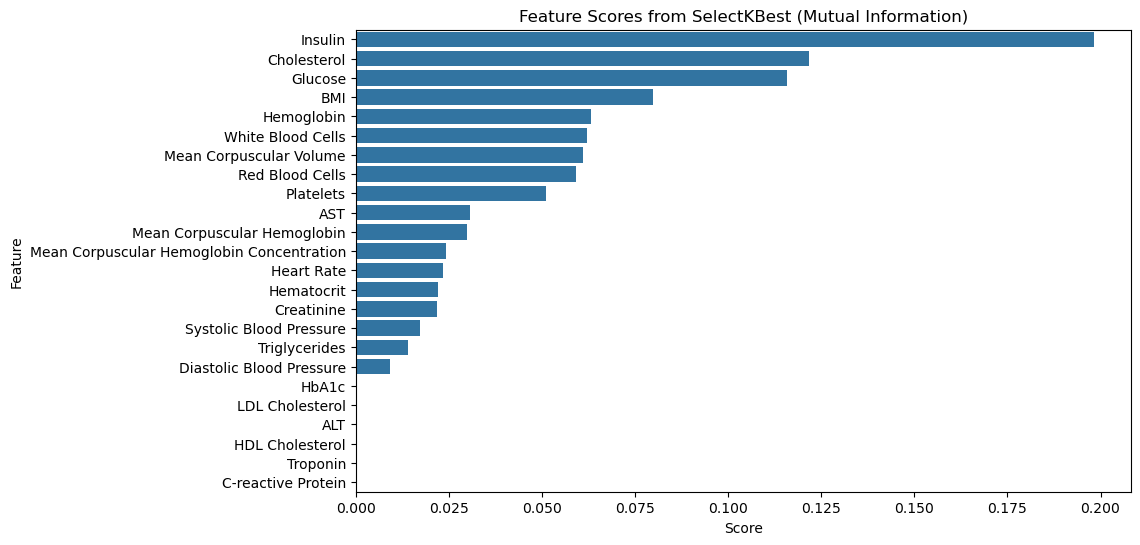

In [52]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Feature', data=feature_scores)
plt.title('Feature Scores from SelectKBest (Mutual Information)')
plt.show()

In [53]:
# Reduce dataset to selected features
X_train_reduced = x_train[selected_features]
X_test_reduced = x_test[selected_features]

In [55]:
#second train
nb.fit(X_train_reduced, y_train)
nb_predsNew = nb.predict(X_test_reduced)

In [59]:
print(classification_report(y_test,nb_preds,zero_division=0))

              precision    recall  f1-score   support

           0       0.58      0.32      0.41        22
           1       0.68      0.93      0.79        57
           2       0.00      0.00      0.00         1
           3       0.50      0.17      0.25         6
           4       0.40      0.22      0.29         9
           5       1.00      0.33      0.50         3

    accuracy                           0.65        98
   macro avg       0.53      0.33      0.37        98
weighted avg       0.62      0.65      0.61        98



In [60]:
print(classification_report(y_test,nb_predsNew,zero_division=0))

              precision    recall  f1-score   support

           0       0.82      0.41      0.55        22
           1       0.75      0.98      0.85        57
           2       0.00      0.00      0.00         1
           3       0.50      0.33      0.40         6
           4       0.50      0.22      0.31         9
           5       0.67      0.67      0.67         3

    accuracy                           0.72        98
   macro avg       0.54      0.44      0.46        98
weighted avg       0.71      0.72      0.69        98



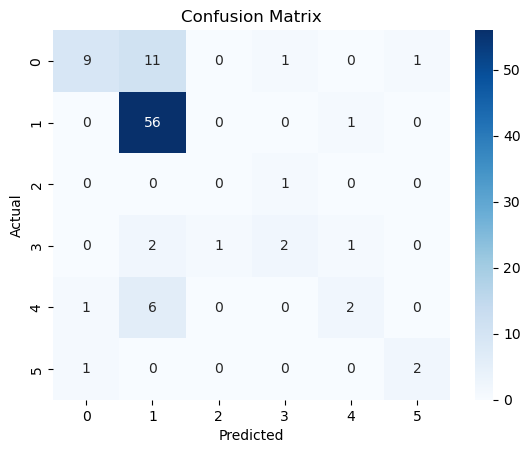

In [63]:
sns.heatmap(confusion_matrix(y_test,nb_predsNew), annot=True, fmt="d", cmap="Blues",
            xticklabels=nb.classes_,
            yticklabels=nb.classes_)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [67]:
mse = mean_squared_error(y_test,nb_predsNew)
r2Score = r2_score(y_test,nb_predsNew)
print("MSE : ",mse,"\nR2 Score : ",r2Score,"\nAccuracy:", accuracy_score(y_test, nb_predsNew))

MSE :  1.6326530612244898 
R2 Score :  0.0408612674333253 
Accuracy: 0.7244897959183674


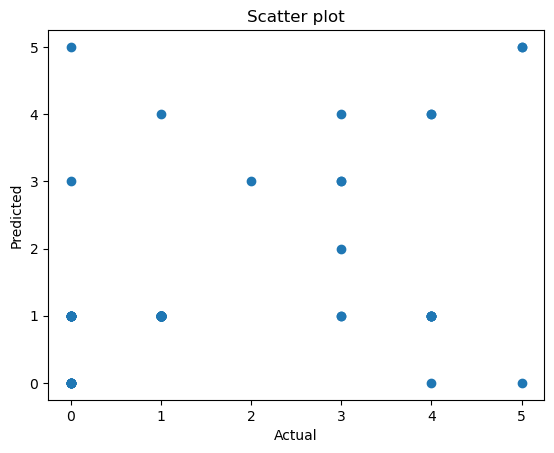

In [68]:
plt.scatter(y_test,nb_predsNew)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Scatter plot")
plt.show()